In [1]:
import numpy as np 
import pandas as pd 
from numpy import genfromtxt

Convert csv into numpy array

In [2]:
weather_data = genfromtxt('climate.csv', delimiter=',', skip_header=1)
weather_data
# for region 1, 25 is Temperature, 76 is Rainfall, 99 is Humidity 

array([[25., 76., 99.],
       [39., 65., 70.],
       [59., 45., 77.],
       ...,
       [99., 62., 58.],
       [70., 71., 91.],
       [92., 39., 76.]])

declaring random weights(Coefficients)

In [3]:
weights = np.array([0.3, 0.2, 0.5])

Calculating Apple yield for all regions

In [4]:
apple_yield = np.matmul(weather_data, weights)
apple_yield

array([72.2, 59.7, 65.2, ..., 71.1, 80.7, 73.4])

add apple_yield(output) in numpy array 

In [5]:
climate_data_with_apple_yield = np.concatenate((weather_data, apple_yield.reshape(10000, 1)), axis=1)
climate_data_with_apple_yield

array([[25. , 76. , 99. , 72.2],
       [39. , 65. , 70. , 59.7],
       [59. , 45. , 77. , 65.2],
       ...,
       [99. , 62. , 58. , 71.1],
       [70. , 71. , 91. , 80.7],
       [92. , 39. , 76. , 73.4]])

saving climate_data_with_apple_yield(numpy array) into csv

In [6]:
np.savetxt('climate_apple.csv', climate_data_with_apple_yield, delimiter=',', fmt='%.2f', header='temperature, rainfall, humidity, yield_apples', comments='')

Now we have csv with output. Lets apply linear regression to it now

In [7]:
path = "climate_apple.csv"
df  = pd.read_csv(path)

In [12]:
df.head()

,temperature,rainfall,humidity,yield_apples
0,25.0,76.0,99.0,72.2
1,39.0,65.0,70.0,59.7
2,59.0,45.0,77.0,65.2
3,84.0,63.0,38.0,56.8
4,66.0,50.0,52.0,55.8


In [18]:
import matplotlib.pyplot as plt

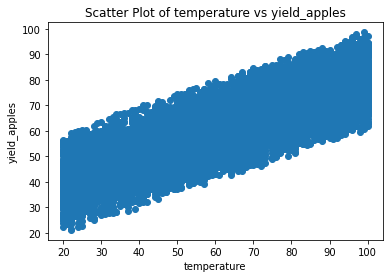

In [22]:
plt.scatter(x =df[" humidity"], y = df[" yield_apples"])
plt.xlabel("temperature")
plt.ylabel("yield_apples")
plt.title("Scatter Plot of temperature vs yield_apples")
plt.show()

In [17]:
X = df.drop(" yield_apples", axis = "columns")
y = df[" yield_apples"]
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)
X

shape of X =  (10000, 3)
shape of y =  (10000,)


,temperature,rainfall,humidity
0,25.0,76.0,99.0
1,39.0,65.0,70.0
2,59.0,45.0,77.0
3,84.0,63.0,38.0
4,66.0,50.0,52.0
...,...,...,...
9995,80.0,72.0,98.0
9996,27.0,58.0,60.0
9997,99.0,62.0,58.0
9998,70.0,71.0,91.0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (8000, 3)
shape of y_train =  (8000,)
shape of X_test =  (2000, 3)
shape of y_test =  (2000,)


In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred  = lr.predict(X_test)
y_pred

array([71.3, 66.9, 32.7, ..., 61.8, 73.2, 50. ])

In [15]:
y_test

3465    71.3
2574    66.9
2223    32.7
4520    47.6
9998    80.7
        ... 
1007    64.5
8989    55.8
9349    61.8
5043    73.2
3921    50.0
Name:  yield_apples, Length: 2000, dtype: float64

In [16]:
y_pred

array([71.3, 66.9, 32.7, ..., 61.8, 73.2, 50. ])

In [13]:
pd.DataFrame(np.c_[X_test, y_test, y_pred])

,0,1,2,3,4
0,45.0,59.0,92.0,71.3,71.3
1,46.0,28.0,95.0,66.9,66.9
2,54.0,25.0,23.0,32.7,32.7
3,32.0,65.0,50.0,47.6,47.6
4,70.0,71.0,91.0,80.7,80.7
...,...,...,...,...,...
1995,26.0,81.0,81.0,64.5,64.5
1996,23.0,87.0,63.0,55.8,55.8
1997,31.0,85.0,71.0,61.8,61.8
1998,34.0,80.0,94.0,73.2,73.2


In [14]:
lr.score(X_test,y_test)

1.0